# Prática - Monte Carlo: Estimativa de Integrais por Amostragem Direta

---

**Dupla:**
* Diane Fenzi Gonçalves (2019006574)
* Rubia Alice Moreira de Souza (2022043507)

## Imports

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Callable

## Funções Auxiliares

---

Abaixo temos algumas funções que iremos utilizar para fazer os cálculos da prática, além de fazer o print das informações e plot de histogramas dos resultados obtidos.

In [2]:
randomNumberGenerator = np.random.default_rng()

In [3]:
def gerarNumeroAleatorio(min: float, max: float) -> float:
  numeroAleatorio: float = randomNumberGenerator.random()
  return (numeroAleatorio * (max - min)) + min

In [4]:
def gerarListaNumerosAleatorios(
    min: float,
    max: float,
    tamanho: int
  ) -> list[float]:

  return np.random.uniform(
    low = min,
    high = max,
    size = tamanho
  )

In [5]:
def calcularErroEstatistico(valores: list[float]) -> float:
  desvioPadrao: float = valores.std(ddof = 1)
  quantidadeValores: int = len(valores)

  erroEstatistico: float = desvioPadrao / np.sqrt(quantidadeValores)
  return erroEstatistico

In [6]:
def printEstatisticas(resultados: list[float]) -> None:
  media = resultados.mean()
  desvioPadrao = resultados.std(ddof = 1)
  erroEstatistico = calcularErroEstatistico(resultados)

  print(f'Média: {media}')
  print(f'Desvio Padrão: {desvioPadrao}')
  print(f'Erro Estatístico: {erroEstatistico}')

In [7]:
def gerarHistograma(resultados: list[float]) -> None:
  plt.hist(
    resultados,
    bins = 10,
    edgecolor = 'black'
  )

  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()

## Funções de Cálculo de Integral

---

Primeiro, realizamos a implementação de Monte Carlo para resolver integrais simples com a função abaixo.

In [98]:
def calcularIntegralSimples(
    quantidadeValoresAleatorios: int,
    xMin: float,
    xMax: float,
    expressao: Callable[[float], float]
  ) -> float:

  listaValoresAleatorios: list[float] = gerarListaNumerosAleatorios(
    xMin,
    xMax,
    quantidadeValoresAleatorios
  )

  listaValoresExpressao: list[float] = np.array(
    [(expressao(valor)) for valor in listaValoresAleatorios]
  )

  somaValores: float = listaValoresExpressao.sum()
  rangeFuncao: float = xMax - xMin

  return rangeFuncao / quantidadeValoresAleatorios * somaValores

Depois, tornamos a solução mais genérica possibilitando resolver integrais múltiplas de "n" dimensões.

A quantidade de dimensões é derivada a partir da quantidade de tuplas presentes no array de "dimensoes" passado por parâmetro. As tuplas, por sua vez, são as faixas de integração da respectiva dimensão.

In [9]:
def calcularIntegralMultipla(
    quantidadeValoresAleatorios: int,
    dimensoes: list[tuple[float, float]],
    expressao: Callable[[list[float]], float]
  ) -> float:

  def calcularProdutorioFaixasValores(
    dimensoes: list[tuple[float, float]]
    ) -> float:

    rangeDimensoes: list[float] = np.array(
      [(max - min) for min, max in dimensoes]
    )
    return rangeDimensoes.prod()

  def calcularSomatorioResultadosExpressao(
    quantidadeValoresAleatorios: int,
    dimensoes: list[tuple[float, float]],
    expressao: Callable[[list[float]], float]
    ) -> float:

    def gerarNumerosAleatoriosParaDimensoes(
      dimensoes: list[tuple[float, float]],
      quantidadeValoresAleatorios: int
      ) -> list[list[float]]:

      quantidadeDimensoes: int = len(dimensoes)
      listaValores: list[list[float]] = [None] * quantidadeValoresAleatorios

      for i in range(quantidadeValoresAleatorios):
        valores: list[float] = np.zeros(quantidadeDimensoes)

        for j in range(quantidadeDimensoes):
          xMin, xMax = dimensoes[j]
          valores[j] = gerarNumeroAleatorio(xMin, xMax)

        listaValores[i] = valores

      return np.array(listaValores)

    listaValoresAleatorios: list[list[float]] = gerarNumerosAleatoriosParaDimensoes(
      dimensoes,
      quantidadeValoresAleatorios
    )

    resultados: list[float] = np.array(
      [(expressao(valores)) for valores in listaValoresAleatorios]
    )

    return resultados.sum()

  produtoFaixaValores: float = calcularProdutorioFaixasValores(dimensoes)
  somaResultadosExpressao: float = calcularSomatorioResultadosExpressao(
      quantidadeValoresAleatorios,
      dimensoes,
      expressao
  )

  return produtoFaixaValores * somaResultadosExpressao / quantidadeValoresAleatorios

## Funções de Teste

---

Abaixo nós temos as funções que iremos calcular as integrais delas por meio do Monte Carlo.

In [10]:
def primeiraFuncao(x: float) -> float:
  return np.exp(-(x ** 2))

In [11]:
def segundaFuncao(valores: list[float]) -> float:
  x1: float = valores[0]
  x2: float = valores[1]
  x3: float = valores[2]

  return ((x1 * (x2 ** 2)) / x3)

In [12]:
def terceiraFuncao(valores: list[float]) -> float:
  x1: float = valores[0]
  x2: float = valores[1]
  x3: float = valores[2]

  y1: float = valores[3]
  y2: float = valores[4]
  y3: float = valores[5]

  z1: float = valores[6]
  z2: float = valores[7]
  z3: float = valores[8]

  resultadoX: float = (x1 + x2) * x3
  resultadoY: float = (y1 + y2) * y3
  resultadoZ: float = (z1 + z2) * z3

  return 1 / (resultadoX + resultadoY + resultadoZ)

## Cálculos das Integrais por Monte Carlo

---

### Cálculo Integral 1

---

In [47]:
resultado: float = calcularIntegralSimples(
    quantidadeValoresAleatorios = 10000,
    xMin = -3,
    xMax = 3,
    expressao = primeiraFuncao
)

print(f"O resultado da integral para a primeira integral é: {resultado}")

O resultado da integral para a primeira integral é: 1.7584364284040623


Acima temos o resultado obtido para o cálculo de uma amostra para a primeira integral, utilizando 10.000 valores aleatórios.

É possível notar que esse valor se aproxima bastante do valor real da integral. Segundo o Wolfram Alpha, o valor estimado seria de 1.772.

No entanto, ainda seria possível melhorar a estimativa realizando várias amostras, que é o que será feito pelo trecho de código a seguir.

Iremos realizar testes com 1000 amostras e variando a quantidade de números aleatórios. Primeiro faremos com 100, depois 1000 e, por fim, 10.000.


In [14]:
def calcularAmostrasPrimeiraIntegral(
  quantidadeAmostras: int,
  quantidadeNumerosAleatorios: int
  ) -> list[float]:

  resultados: list[float] = np.zeros(quantidadeAmostras)

  for i in range(quantidadeAmostras):
    resultados[i] = calcularIntegralSimples(
      quantidadeValoresAleatorios = quantidadeNumerosAleatorios,
      xMin = -3,
      xMax = 3,
      expressao = primeiraFuncao
    )

  return resultados

#### Testes de 1.000 amostras com 100 valores aleatórios

---

In [15]:
resultados: list[float] = calcularAmostrasPrimeiraIntegral(
    quantidadeAmostras = 1000,
    quantidadeNumerosAleatorios = 100
)

In [16]:
printEstatisticas(resultados)

Média: 1.7736023839144455
Desvio Padrão: 0.20689421596415716
Erro Estatístico: 0.006542569571615063


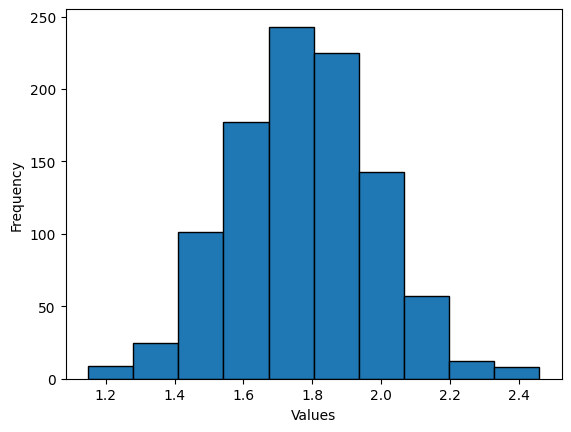

In [17]:
gerarHistograma(resultados)

#### Testes de 1.000 amostras com 1.000 valores aleatórios

---

In [48]:
resultados: list[float] = calcularAmostrasPrimeiraIntegral(
    quantidadeAmostras = 1000,
    quantidadeNumerosAleatorios = 1000
)

In [49]:
printEstatisticas(resultados)

Média: 1.7689685445930963
Desvio Padrão: 0.06648813370248488
Erro Estatístico: 0.0021025393987365625


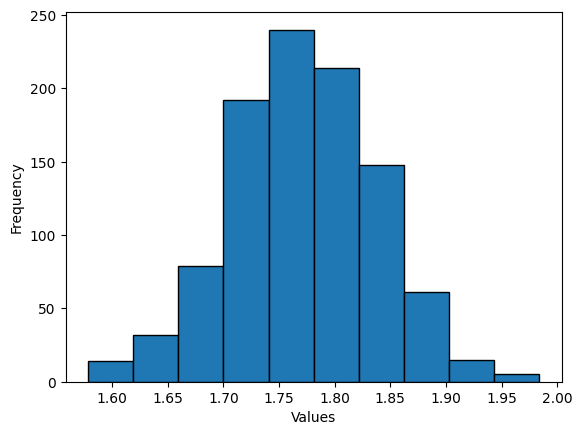

In [20]:
gerarHistograma(resultados)

#### Testes de 1.000 amostras com 10.000 valores aleatórios

---

In [55]:
resultados: list[float] = calcularAmostrasPrimeiraIntegral(
    quantidadeAmostras = 1000,
    quantidadeNumerosAleatorios = 10000
)

In [56]:
printEstatisticas(resultados)

Média: 1.7726895643977405
Desvio Padrão: 0.020025956719297997
Erro Estatístico: 0.000633276355569349


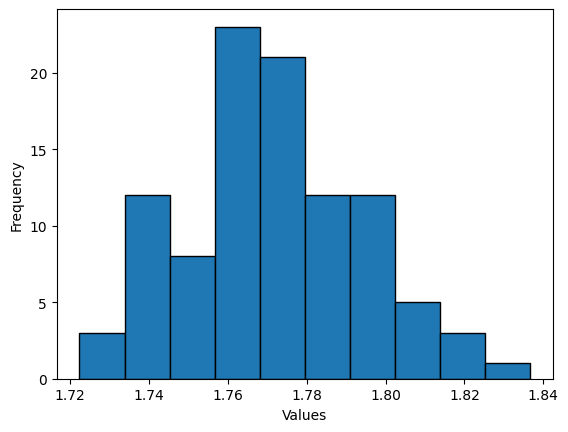

In [23]:
gerarHistograma(resultados)

#### Análise dos resultados

---

Em suma, obtivemos como resultados para 1.000 amostras:

**100 Valores aleatórios:**
* Média: 1.7736023839144455
* Desvio Padrão: 0.20689421596415716
* Erro Estatístico: 0.006542569571615063

**1.000 Valores aleatórios:**
* Média: 1.7689685445930963
* Desvio Padrão: 0.06648813370248488
* Erro Estatístico: 0.0021025393987365625

**10.000 Valores aleatórios:**
* Média: 1.7726895643977405
* Desvio Padrão: 0.020025956719297997
* Erro Estatístico: 0.000633276355569349

**Valor exato pelo Wolfram Alpha:** 1.772

É possível notar que quanto mais valores aleatórios são utilizados para estimar o valor da integral, mais preciso será o resultado, uma vez que o erro estatístico tende a diminuir com base na quantidade de valores que são utilizados.

### Cálculo Integral 2

---

Agora iremos realizar o mesmo processo anterior, mas para uma faixa de integração diferente. Desta vez, iremos integrar entre (-10, 10) ao invés de (-3, 3).

O resultado para 10.000 valores aleatórios é o seguinte:

In [77]:
resultado: float = calcularIntegralSimples(
    quantidadeValoresAleatorios = 10000,
    xMin = -10,
    xMax = 10,
    expressao = primeiraFuncao
)

print(f"O resultado da integral para a terceira integral é: {resultado}")

O resultado da integral para a terceira integral é: 1.7797005936127812


Realizando testes de 1.000 para a quantidade de números aleatórios de 100, 1.000 e 10.000:

In [25]:
def calcularAmostrasSegundaIntegral(
    quantidadeAmostras: int,
    quantidadeNumerosAleatorios: int
  ) -> list[float]:

  resultados: list[float] = np.zeros(quantidadeAmostras)

  for i in range(quantidadeAmostras):
    resultados[i] = calcularIntegralSimples(
      quantidadeValoresAleatorios = quantidadeNumerosAleatorios,
      xMin = -10,
      xMax = 10,
      expressao = primeiraFuncao
    )

  return resultados

#### Testes de 1.000 amostras com 100 valores aleatórios

---

In [26]:
resultados: list[float] = calcularAmostrasSegundaIntegral(
    quantidadeAmostras = 1000,
    quantidadeNumerosAleatorios = 100
)

In [27]:
printEstatisticas(resultados)

Média: 1.7596835019908799
Desvio Padrão: 0.45345027095855944
Erro Estatístico: 0.01433935661849551


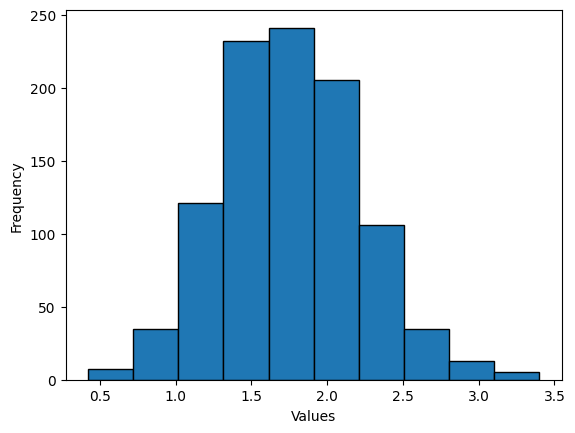

In [28]:
gerarHistograma(resultados)

#### Testes de 1.000 amostras com 1.000 valores aleatórios

---

In [29]:
resultados: list[float] = calcularAmostrasSegundaIntegral(
    quantidadeAmostras = 1000,
    quantidadeNumerosAleatorios = 1000
)

In [30]:
printEstatisticas(resultados)

Média: 1.776451977347635
Desvio Padrão: 0.14688522735969892
Erro Estatístico: 0.004644918730883291


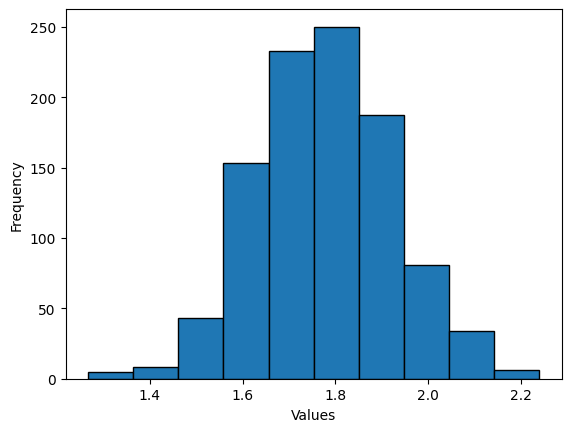

In [31]:
gerarHistograma(resultados)

#### Testes de 1.000 amostras com 10.000 valores aleatórios

---

In [32]:
resultados: list[float] = calcularAmostrasSegundaIntegral(
    quantidadeAmostras = 1000,
    quantidadeNumerosAleatorios = 10000
)

In [33]:
printEstatisticas(resultados)

Média: 1.7702461772818223
Desvio Padrão: 0.046132756256970074
Erro Estatístico: 0.001458845845134095


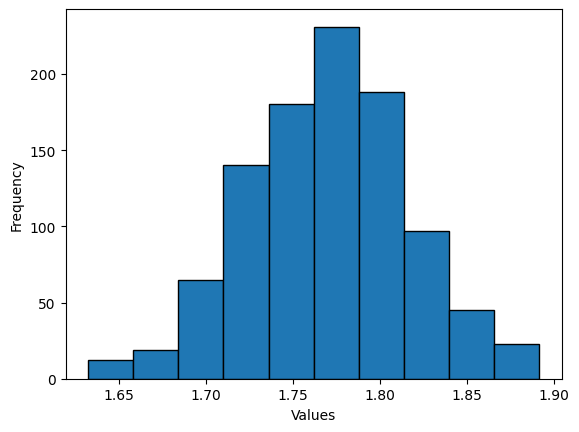

In [34]:
gerarHistograma(resultados)

#### Análise dos resultados

---

**100 Valores aleatórios:**
* Média: 1.7596835019908799
* Desvio Padrão: 0.45345027095855944
* Erro Estatístico: 0.01433935661849551

**1.000 Valores aleatórios:**
* Média: 1.776451977347635
* Desvio Padrão: 0.14688522735969892
* Erro Estatístico: 0.004644918730883291

**10.000 Valores aleatórios:**
* Média: 1.7702461772818223
* Desvio Padrão: 0.046132756256970074
* Erro Estatístico: 0.001458845845134095

**Valor exato pelo Wolfram Alpha:** 1.772

Novamente, é possível observar que quanto mais valores aleatórios são utilizados menor o erro estatístico e, por consequência, mais próximo os resultados estimados são do valor real.


### Cálculo Integral 3

---



Agora vamos realizar as mesmas analises, mas para integrais múltiplas. Neste caso, iremos trabalhar com uma função em 3 dimensões.

O resultado para uma amostra da função com 10.000 valores aleatórios é o seguinte:

In [60]:
resultado: float = calcularIntegralMultipla(
    quantidadeValoresAleatorios = 10000,
    dimensoes = [(-1, 1), (0, 1), (1, 2)],
    expressao = segundaFuncao
)

print(f"O resultado da integral para a terceira integral é: {resultado}")

O resultado da integral para a terceira integral é: 0.00457200670490661


Realizando novamente os testes para diversas amostras:

In [36]:
def calcularAmostrasTerceiraIntegral(
    quantidadeAmostras: int,
    quantidadeNumerosAleatorios: int
  ) -> list[float]:

  resultados: list[float] = np.zeros(quantidadeAmostras)

  for i in range(quantidadeAmostras):
    resultados[i] = calcularIntegralMultipla(
      quantidadeValoresAleatorios = quantidadeNumerosAleatorios,
      dimensoes = [(-1, 1), (0, 1), (1, 2)],
      expressao = segundaFuncao
    )

  return resultados

#### Testes de 1.000 amostras com 100 valores aleatórios

---

In [37]:
resultados: list[float] = calcularAmostrasTerceiraIntegral(
    quantidadeAmostras = 1000,
    quantidadeNumerosAleatorios = 100
)

In [38]:
printEstatisticas(resultados)

Média: -0.00063164123948017
Desvio Padrão: 0.03690562930486397
Erro Estatístico: 0.001167058470852268


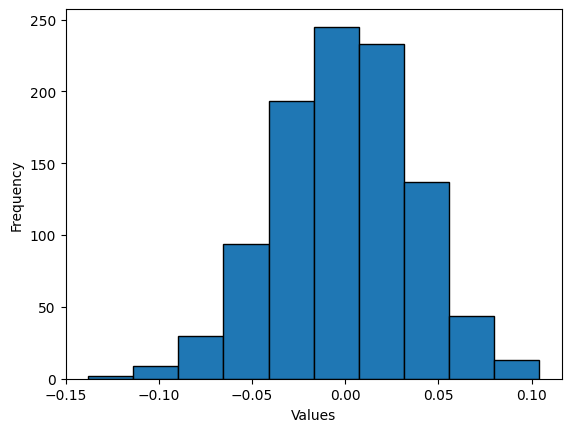

In [39]:
gerarHistograma(resultados)

#### Testes de 1.000 amostras com 1.000 valores aleatórios

---

In [40]:
resultados: list[float] = calcularAmostrasTerceiraIntegral(
    quantidadeAmostras = 1000,
    quantidadeNumerosAleatorios = 1000
)

In [41]:
printEstatisticas(resultados)

Média: -0.00025672370163192263
Desvio Padrão: 0.011915826145260572
Erro Estatístico: 0.000376811508216078


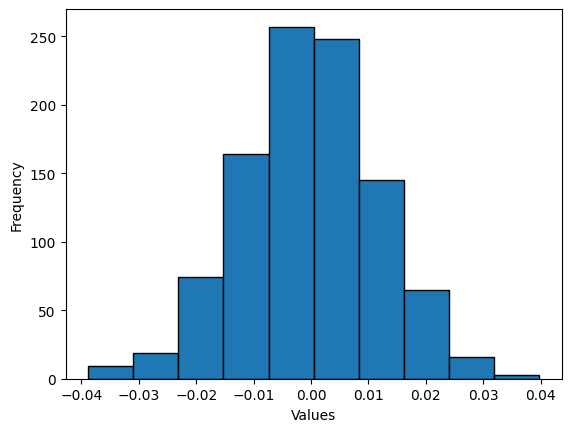

In [42]:
gerarHistograma(resultados)

#### Testes de 1.000 amostras com 10.000 valores aleatórios

---

In [43]:
resultados: list[float] = calcularAmostrasTerceiraIntegral(
    quantidadeAmostras = 1000,
    quantidadeNumerosAleatorios = 10000
)

In [44]:
printEstatisticas(resultados)

Média: -0.00012053921961977924
Desvio Padrão: 0.0035835693409296088
Erro Estatístico: 0.00011332241270486025


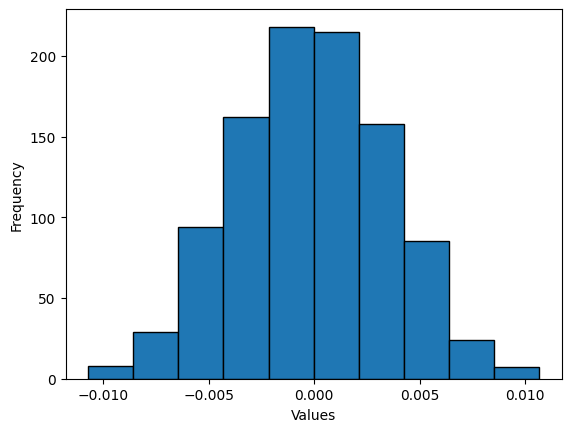

In [45]:
gerarHistograma(resultados)

#### Análise dos resultados

---

**100 Valores aleatórios:**
* Média: -0.00063164123948017
* Desvio Padrão: 0.03690562930486397
* Erro Estatístico: 0.001167058470852268

**1.000 Valores aleatórios:**
* Média: -0.00025672370163192263
* Desvio Padrão: 0.011915826145260572
* Erro Estatístico: 0.000376811508216078

**10.000 Valores aleatórios:**
* Média: -0.00012053921961977924
* Desvio Padrão: 0.0035835693409296088
* Erro Estatístico: 0.00011332241270486025

**Valor exato pelo Wolfram Alpha:** 0

Neste caso, estamos trabalhando com uma função ímpar, que possui simetria em relação à origem. Como estamos integrando de (-1, 1), a parte positiva e negativa se cancelam, tendo como resultado 0.

### Cálculo Integral 4

---

Por fim, podemos expandir isso para "n" dimensões. Neste caso, iremos realizar avaliar uma integral com 9 dimensões em que todos intervalos de integração são entre (0, 1):

In [89]:
resultado: float = calcularIntegralMultipla(
    quantidadeValoresAleatorios = 1000,
    dimensoes = [(0, 1)] * 9,
    expressao = terceiraFuncao
)

print(f"O resultado da integral para a terceira integral é: {resultado}")

O resultado da integral para a terceira integral é: 0.860144012179394


Novamente, se testarmos para uma quantidade muito grande de amostras e valores aleatórios, iremos chegar em valores cada vez mais próximos do resultado real da integral.

Neste caso, vamos testar dois extremos. Primeiro, testamos 10 amostras e 10 números aleatórios, que deve dar um erro estatístico alto. Depois, tentaremos 10.000 amostras e 10.000 números aleatórios para a integral com 9 dimensões.

In [91]:
def calcularAmostrasTerceiraIntegral(
    quantidadeAmostras: int,
    quantidadeNumerosAleatorios: int
  ) -> list[float]:

  resultados: list[float] = np.zeros(quantidadeAmostras)

  for i in range(quantidadeAmostras):
    resultados[i] = calcularIntegralMultipla(
      quantidadeValoresAleatorios = quantidadeNumerosAleatorios,
      dimensoes = [(0, 1)] * 9,
      expressao = terceiraFuncao
    )

  return resultados

#### Testes de 10 amostras com 10 valores aleatórios

---

In [95]:
resultados: list[float] = calcularAmostrasTerceiraIntegral(
    quantidadeAmostras = 10,
    quantidadeNumerosAleatorios = 10
)

In [96]:
printEstatisticas(resultados)

Média: 0.9107430136514919
Desvio Padrão: 0.19191948078062634
Erro Estatístico: 0.06069026866236893


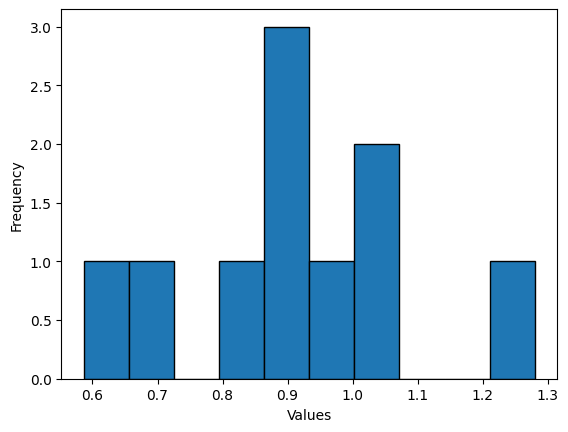

In [97]:
gerarHistograma(resultados)

#### Testes de 10.000 amostras com 10.000 valores aleatórios

---

In [92]:
resultados: list[float] = calcularAmostrasTerceiraIntegral(
    quantidadeAmostras = 10000,
    quantidadeNumerosAleatorios = 10000
)

In [93]:
printEstatisticas(resultados)

Média: 0.8627409938464662
Desvio Padrão: 0.0069049620518020945
Erro Estatístico: 6.904962051802094e-05


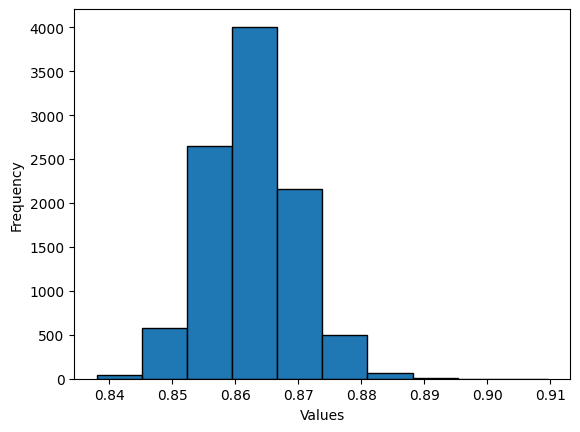

In [94]:
gerarHistograma(resultados)

#### Análise dos resultados

---

**10 Valores aleatórios:**
* Média: 0.9107430136514919
* Desvio Padrão: 0.19191948078062634
* Erro Estatístico: 0.06069026866236893

**10.000 Valores aleatórios:**
* Média: 0.8627409938464662
* Desvio Padrão: 0.0069049620518020945
* Erro Estatístico: 6.904962051802094e-05

Novamente, conforme esperado, conseguimos ver que a Lei dos Grandes Números é algo que o método de Monte Carlo tira como vantagem para conseguir obter valores cada vez mais precisos.

Quando realizamos estimativas com apenas 10 valores aleatórios e 10 amostras, nós obtemos um resultado bem ruim e com um erro estatístico bem alto. Por outro lado, quando realizamos testes com muitos números aleatórios e amostras, nós conseguimos chegar em valores bem precisos.

Uma ótima vantagem desse método, além da sua implementação simples, é que ele consegue ser utilizado para uma quantidade de "n" dimensões, tornando-o bem flexível.